In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_excel("../added new data.xlsx")
df.head()

,name,image,number of country national flag,landmass,zone,area,population,language,religion,bars,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,https://en.wikipedia.org/wiki/Flag_of_Afghanis...,27.0,5,1,648,16,10,2,0,...,0,0,0,0,0,0,0,1,white,white
1,Albania,https://upload.wikimedia.org/wikipedia/commons...,9.0,3,1,29,3,6,6,0,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,https://upload.wikimedia.org/wikipedia/commons...,1.0,4,1,2388,20,8,2,2,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,https://upload.wikimedia.org/wikipedia/commons...,1.0,6,3,0,0,1,1,0,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,https://upload.wikimedia.org/wikipedia/commons...,7.0,3,1,0,0,6,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [3]:
language_mapping = {
    1: 'English',
    2: 'Spanish',
    3: 'French',
    4: 'German',
    5: 'Slavic',
    6: 'Other Indo-European',
    7: 'Chinese',
    8: 'Arabic',
    9: 'Japanese/Turkish/Finnish/Magyar',
    10: 'Others'
}
landmass_mapping={
    1:'N.America',
    2:'S.America',
    3:'Europe',
    4:'Africa',
    5:'Asia',
    6:'Oceania',
}
religion_mapping={
    0:'Catholic',
    1:'Other Christian',
    2:'Muslim', 
    3:'Buddhist',
    4:'Hindu',
    5:'Ethnic',
    6:'Marxist', 
    7:'Others'
}

colour_palette_mapping = dict(zip(df['mainhue'].unique(), df['mainhue'].unique()))
colour_palette_mapping['other colour'] = "pink"

df['language_text'] = df['language'].map(language_mapping)
df['religion_text'] = df['religion'].map(religion_mapping)
df['landmass_text'] = df['landmass'].map(landmass_mapping)


### For better understanding, I added new columns with text for `language`, `landmass`, and `religion`.
### `Colour pallete mapping` dataframe is for correct color visualization 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   name                             193 non-null    object 
 1   image                            85 non-null     object 
 2   number of country national flag  69 non-null     float64
 3   landmass                         193 non-null    int64  
 4   zone                             193 non-null    int64  
 5   area                             193 non-null    int64  
 6   population                       193 non-null    int64  
 7   language                         193 non-null    int64  
 8   religion                         193 non-null    int64  
 9   bars                             193 non-null    int64  
 10  stripes                          193 non-null    int64  
 11  colours                          193 non-null    int64  
 12  red                   

For better understanding of these columns, read the `readme.md` file.

In [5]:
def graphing_template(title,xLabel, yLabel,rotation=0):    
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.xticks(rotation= rotation ,fontsize=10)

  
    """
    Function for plt template.
    Parameters:
    - title: main title.
    - xLabel: text in x axis in plot.
    - yLabel: text in y axis in plot.
    - rotation: rotation degree.

    """

### Task 1: Which color is the most popular in national flags?

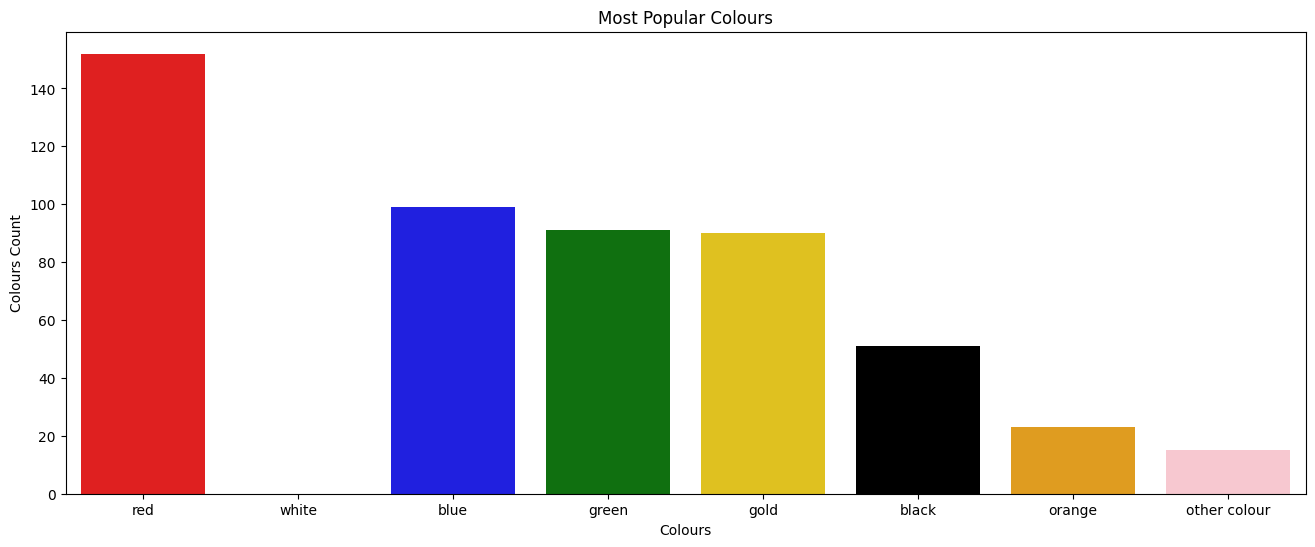

In [6]:
colours = ['blue', 'red', 'green', 'orange', 'gold', 'white', 'black','other colour']
all_colours_count = [df['blue'].sum(), df['red'].sum(), df['green'].sum() , df['orange'].sum(), df['gold'].sum(),  df['white'].sum() , df['black'].sum(),df['other colour'].sum()]


colours_df = pd.DataFrame({'colours': colours, 'all_colours_count': all_colours_count})
colours_df.sort_values(by='all_colours_count', ascending=False, inplace=True)

plt.figure(figsize=(16, 6))
sns.barplot(data=colours_df,x='colours', y='all_colours_count',palette=colour_palette_mapping,hue='colours')
graphing_template('Most Popular Colours','Colours','Colours Count')

plt.show()

1. Red is one of the main colors in almost every flag because this color often symbolizes blood, hardiness, and valor. In our Azerbaijani flag, the red color symbolizes mountains. Nearly every Union Jack flag has red color, while Pan-African colors are represented in two sets of colors in African flags:
    * Green, Yellow, and Red.
    * Green, Black, and Red.
2. White symbolizes purity, peace, and innocence. Its popularity can be explained by the fact that white is a clean canvas, and the state doesn’t need to spend money on paints.
3. Blue symbolizes the ocean, sky, and calmness. Blue, White, and Red are the most popular tricolor combinations in flags (e.g., Union Jack, France, Russia, Serbia).
4. Green symbolizes agriculture, earth, fertility, or the Muslim religion, and it is also included in the second Pan-African color set.
5. Gold (Yellow) symbolizes the sun and wealth. It is often used to represent prosperity and abundance.
6. Black symbolizes defeated enemies and death. It is commonly used to signify mourning or remembrance.
7. Orange is less common in flags but can symbolize enthusiasm, creativity, and determination.
8. Other colors like Cyan, Brown, and Purple also appear in some flags:
    * Cyan can symbolize the clean ocean or technological advancement.
    * Brown is often used as a symbol, such as in depictions of eagles, trees, or boats.
    * Purple is the rarest color in flags due to the natural scarcity of purple pigment. Only four national flags include purple.

In [7]:
def find_combination(row):
    combination = []
    for color in row.index:
        if row[color] != 0:
            combination.append(color)
    return ', '.join(combination)

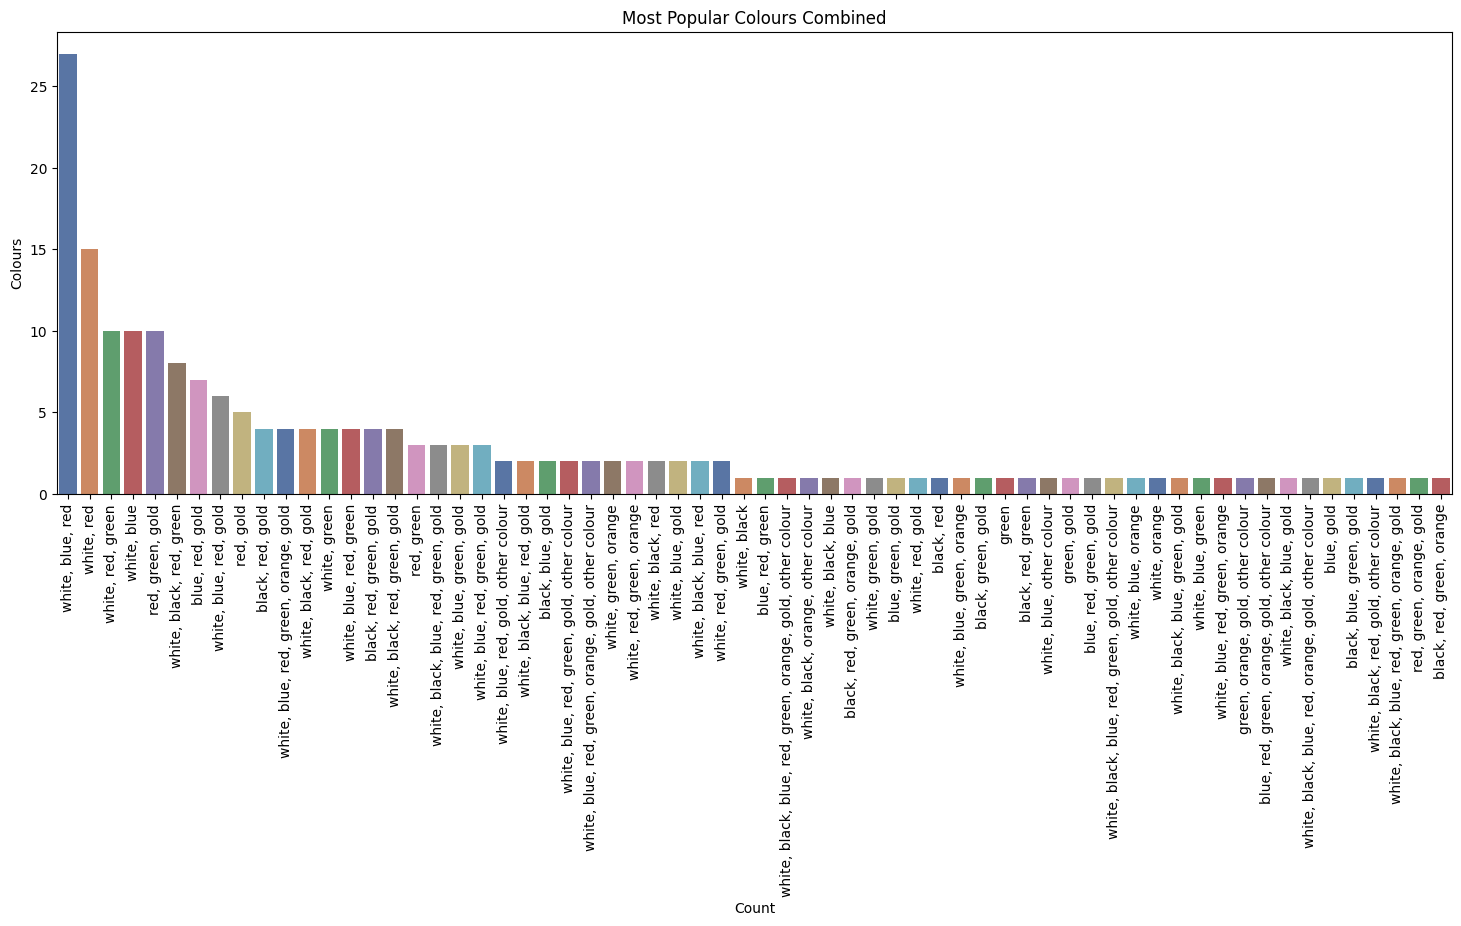

In [18]:
combined_colours_grouped = pd.DataFrame(df.groupby('name')[['white', 'black', 'blue', 'red', 'green', 'orange', 'gold', 'other colour']].sum())
combined_colours_grouped['combination colors'] = combined_colours_grouped.apply(find_combination, axis=1)

combined_colours = pd.DataFrame(Counter(combined_colours_grouped['combination colors']).most_common(), columns=['combination colors', 'count'])
 
plt.figure(figsize=(18, 6))
sns.barplot(data=combined_colours, x='combination colors',y='count',hue='combination colors', palette='deep')
graphing_template('Most Popular Colours Combined','Count','Colours',90)
plt.show()

In [9]:
combined_colours_grouped.sort_values('combination colors',ascending=False)['combination colors']

name
Lebanon     white, red, green, orange
Mexico      white, red, green, orange
Surinam       white, red, green, gold
Togo          white, red, green, gold
Burundi             white, red, green
                      ...            
Haiti                      black, red
Jamaica            black, green, gold
Tanzania     black, blue, green, gold
Bahamas             black, blue, gold
Barbados            black, blue, gold
Name: combination colors, Length: 193, dtype: object

* 27: `white, blue, red` = Luxembourg,Liberia,Netherlands-Antilles,New-Zealand,Panama,Iceland,Laos,North-Korea,Netherlands,Norway,Faeroes,Chile,Czech,Taiwan,Burma,USA,Australia,Cook-Islands,Costa-Rica,UK,Cuba,Dominican-Republic,Western-Samoa,France,French-Guiana,Puerto-Rico,Thailand
* 15: `white, red` = [Tonga, Singapore,Switzerland,Denmark,Indonesia,Tunisia Turkey,Japan,Bahrain,Poland,Austria,Monaco,Greenland, Peru,Canada]
* 10: `white, red, green`  = [Burundi, Ivory-Coast, Oman, Maldive-Islands, Italy, Hungary,Algeria, Iran,Seychelles,Malagasy]
* 10: `white, blue` = [Argentina,Guatemala,Nicaragua,Greece,Somalia,Israel,El-Salvador,Finland,Honduras,Micronesia]
* 10: `red, green, gold` = [Rwanda,Mali,Senegal,Bolivia,Burkina,Congo,Guinea,Ethiopia,Grenada,Cameroon]
* 8: `white, black, red, green` =[UAE,Iraq,Jordan,Kenya,Kuwait,North-Yemen,Sudan,Syria]
* 7: `blue, red, gold` = [Romania,Mongolia,Andorra,Liechtenstein,Chad,Colombia,Ecuador]
* 6: `white, blue, red, gold` =[Anguilla,Malaysia,Philippines,Yugoslavia,Niue,Kiribati]
* 5: `red, gold` =[China,Spain,USSR,Kampuchea,Vietnam]
* 4:`black, red, gold` = [Albania,Angola,Germany,Belgium]

### Top colorful flags 

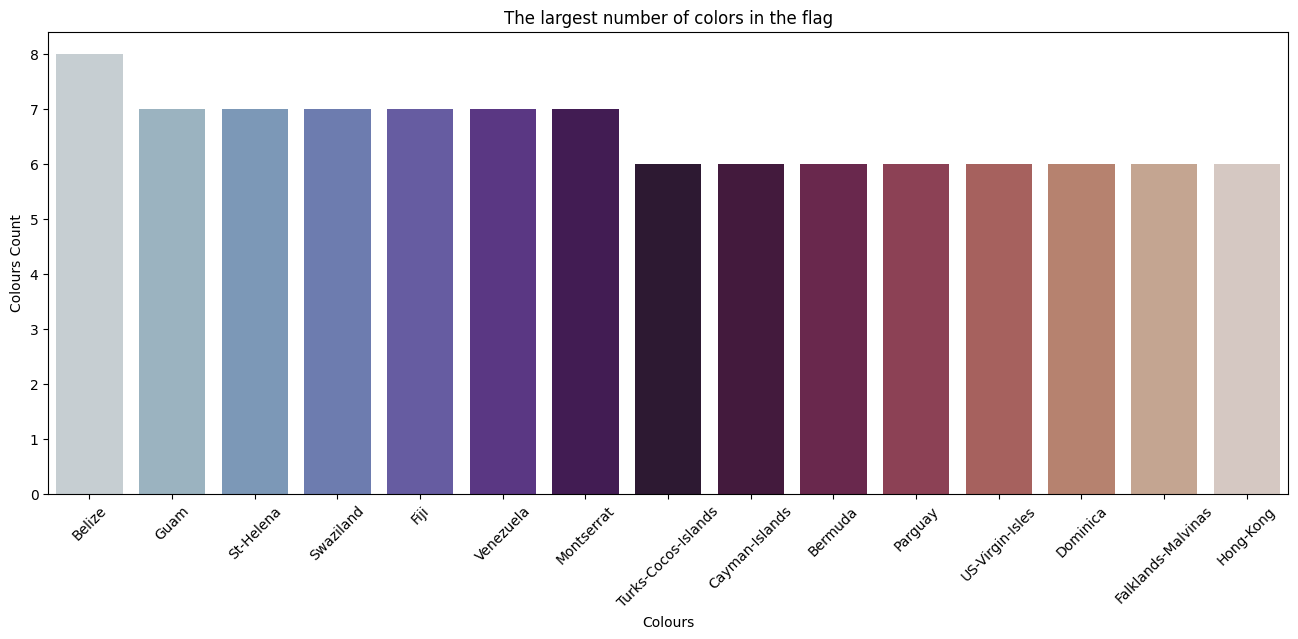

In [21]:
colours_count_by_country = df[['name','colours']].copy()

colours_count_by_country.sort_values(by='colours', ascending=False, inplace=True)   
colour_palette_mapping = {colour: colour for colour in df['colours'].unique()}

plt.figure(figsize=(16, 6))
sns.barplot(data=colours_count_by_country[:15],x='name', y='colours',palette="twilight",hue='name')
graphing_template('The largest number of colors in the flag','Colours','Colours Count',45)

plt.show()

### Top 5 the most colorful flags
* Belize has many colors because of the detailed image in the flag. In the image, two men in front of three hold an axe, and in the center, there is another image of tools and a boat in the sea.
* Guam has a similar situation to Belize, with a detailed picture in the center. The picture depicts an island with palms, sea, sand, and a boat.
* St. Helena also has a picture in the right corner, depicting a bird, rocks, sea, and a boat.
* Swaziland flag has a Swazi shield and weapons in the center with gold, black, white, and grey colors, and a blue-red background.
* Fiji flag has the Union Jack in the top left corner, a cyan background, and a pretty detailed coat of arms in the right corner with palms, a dove, a lion, and bananas.

### Each religion and its color on the flag

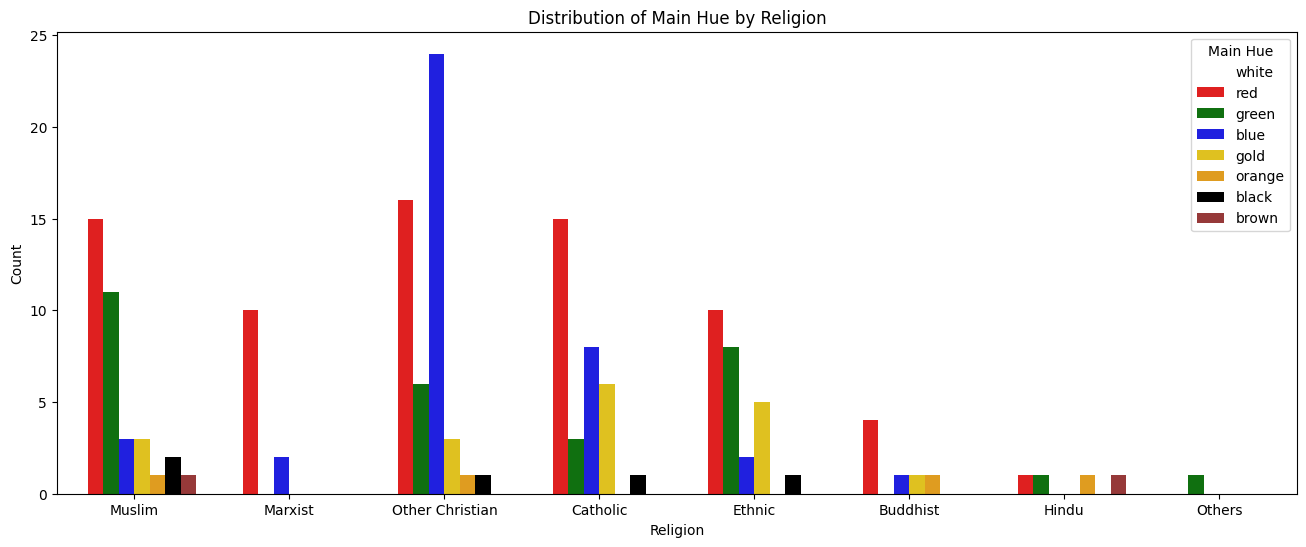

In [11]:
plt.figure(figsize=(16, 6))

color_pallate_map2 = dict(zip(df['mainhue'].unique(), df['mainhue'].unique()))

sns.countplot(data=df, x='religion_text', hue='mainhue',palette=color_pallate_map2)
graphing_template('Distribution of Main Hue by Religion', 'Religion', 'Count')
plt.legend(title='Main Hue')

plt.show()

In general, red is the most popular color, except among "other Christian" flags.

* In the Muslim world, the second most common color is green, because green is associated with Islam.
* In Other Christian flags, blue is commonly associated with themes of purity, devotion, and the Virgin Mary in Christian symbolism. 
* Among ethnic groups, mainly Africans, the second most common color is green (after red).

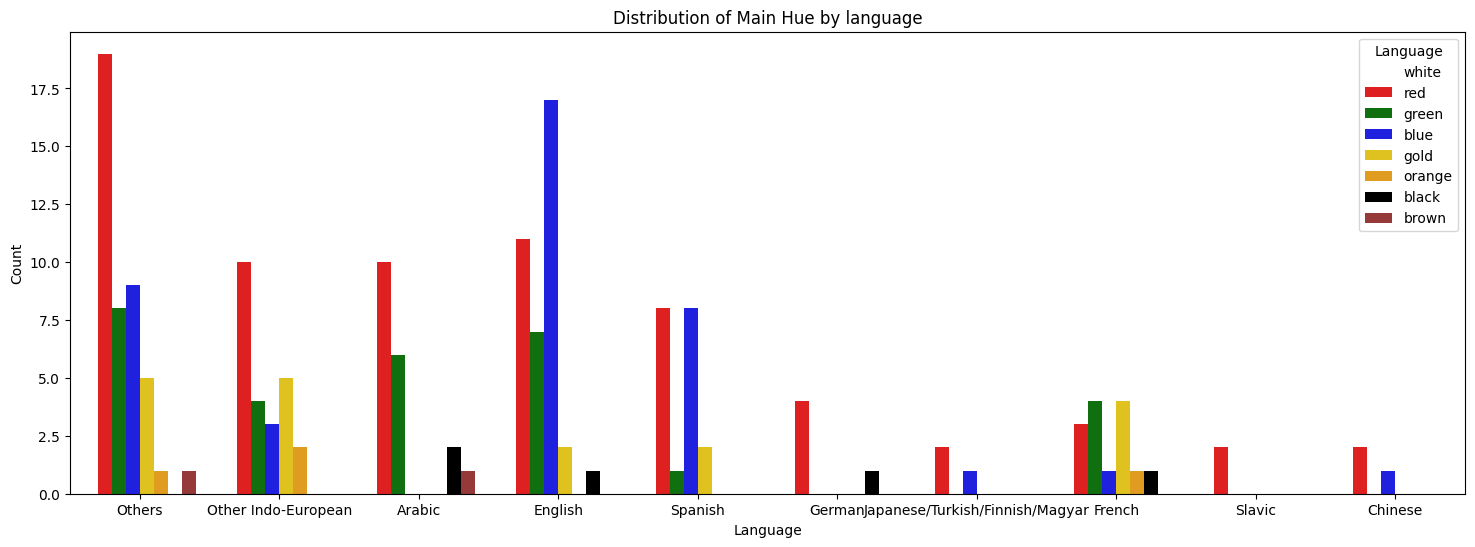

In [12]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='language_text', hue='mainhue', palette=color_pallate_map2)

graphing_template('Distribution of Main Hue by language','Language','Count')
plt.legend(title='Language')

plt.show()

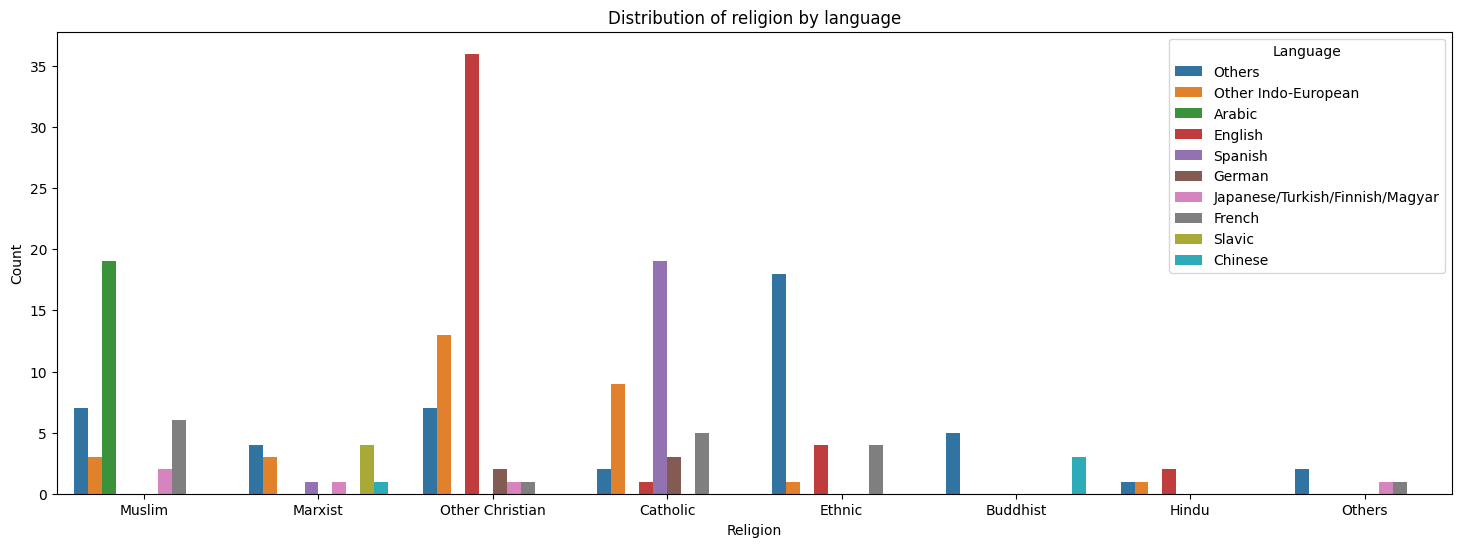

In [13]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='religion_text', hue='language_text')

graphing_template('Distribution of religion by language','Religion','Count')
plt.legend(title='Language')

plt.show()

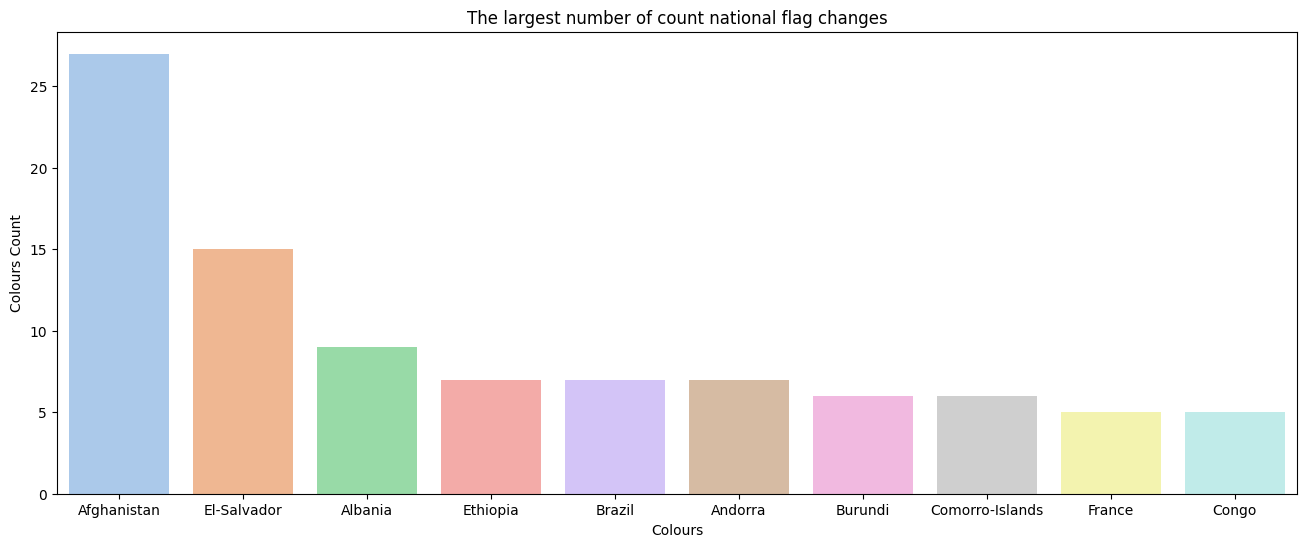

In [14]:
df_copy = df[['number of country national flag','name']].copy()
df_copy.sort_values(by=['number of country national flag'],ascending=False, inplace=True)

plt.figure(figsize=(16, 6))
sns.barplot(data=df_copy[:10],x='name', y='number of country national flag',palette="pastel",hue='name')
graphing_template('The largest number of count national flag changes','Colours','Colours Count')

plt.show()

<Axes: >

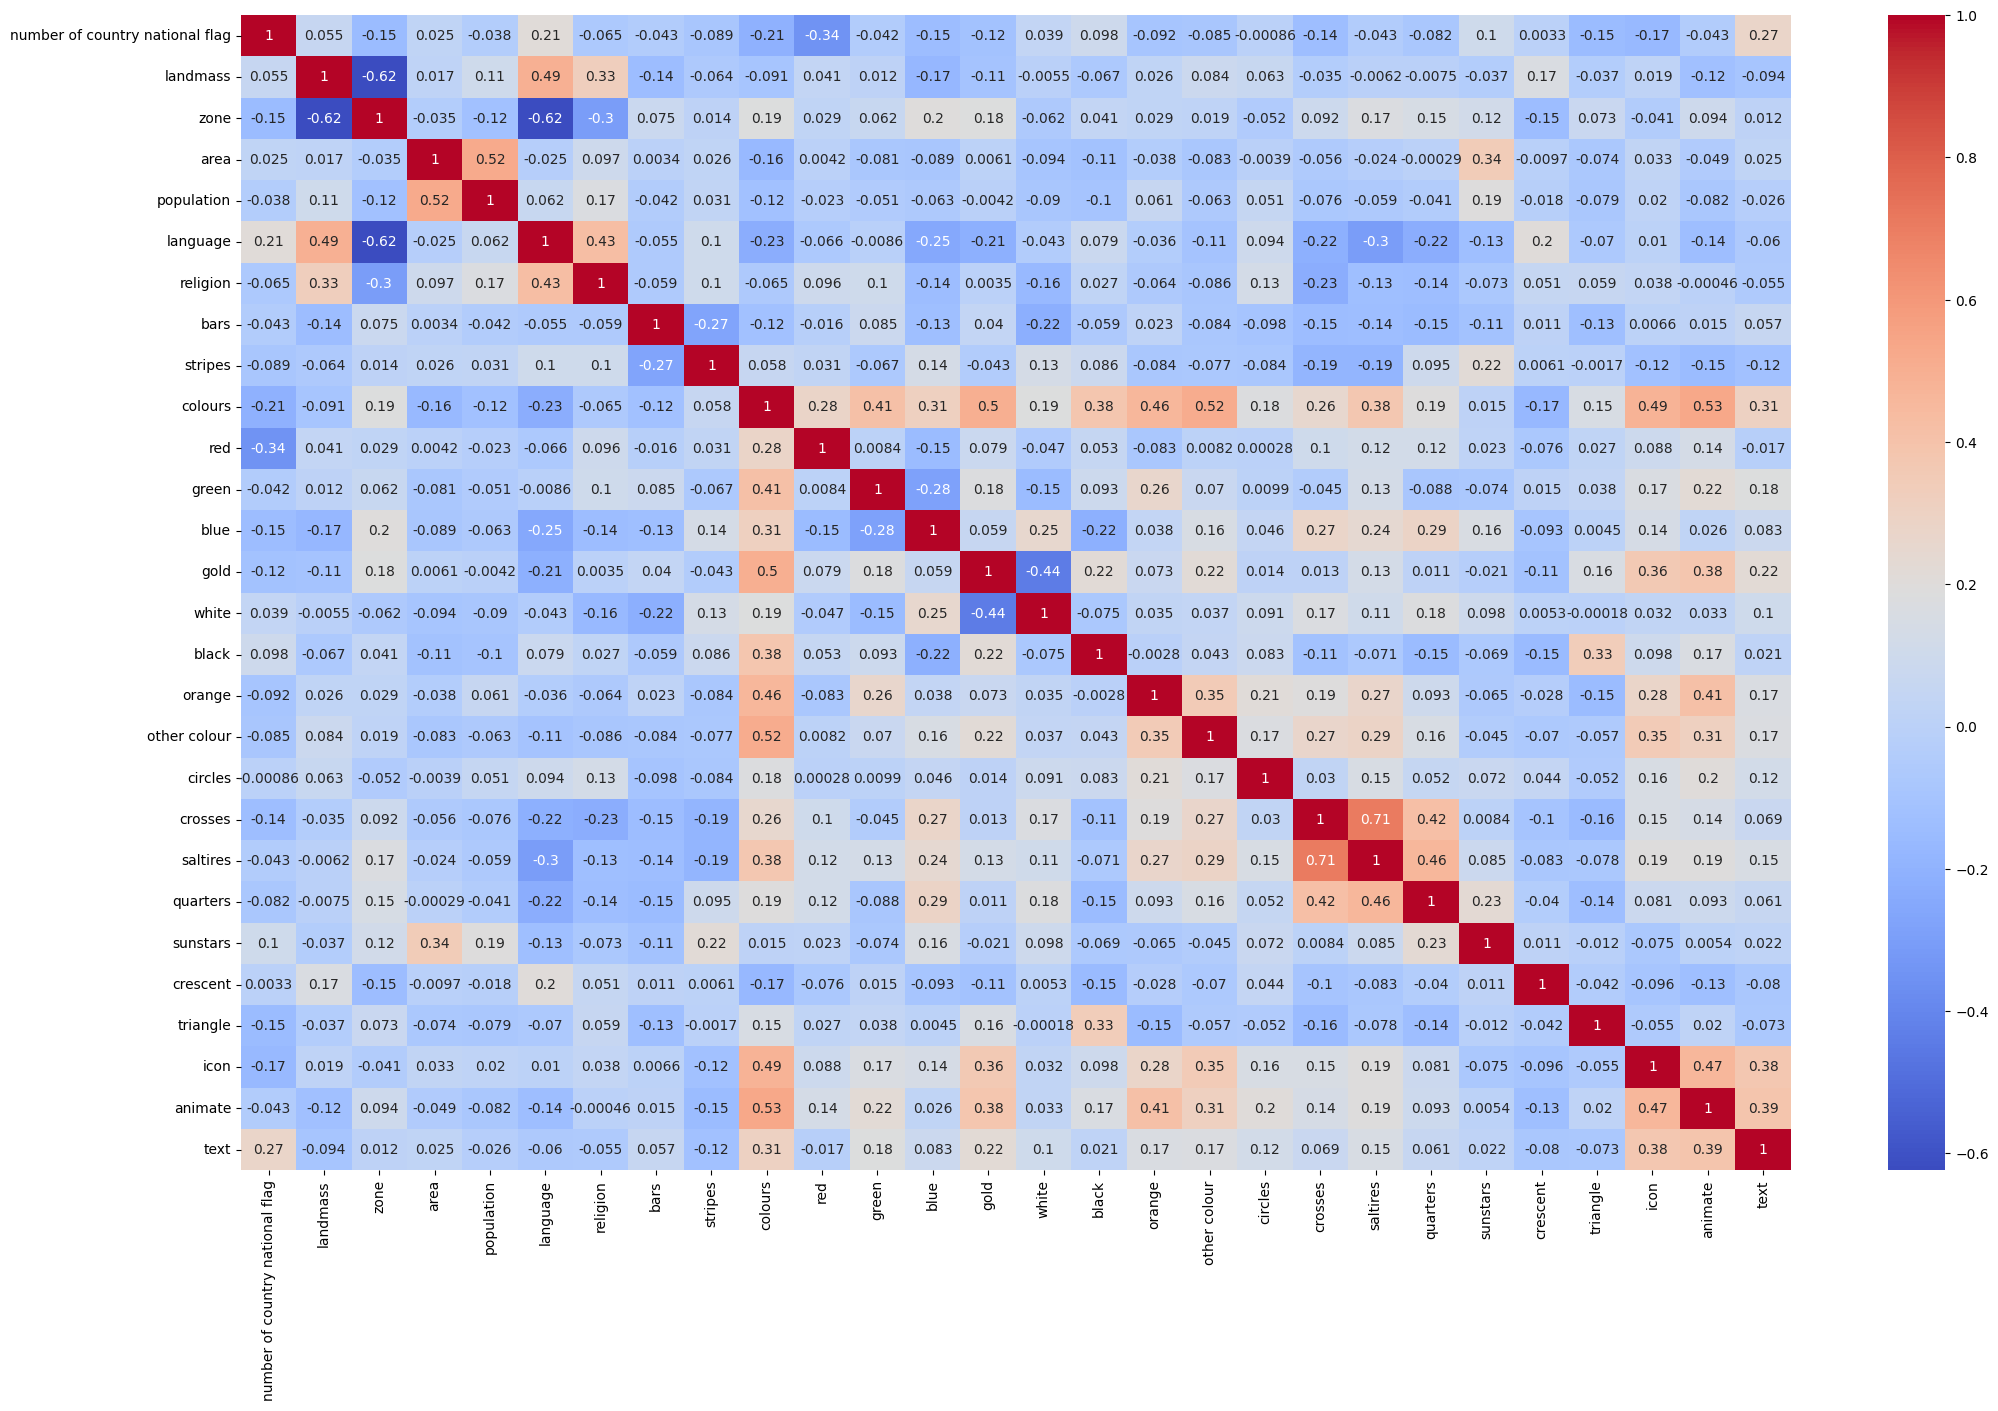

In [15]:
columns_to_exclude = ['name', 'image',  'topleft', 'botright','mainhue','language_text','religion_text','landmass_text']  
df_without_string_columns = df.drop(columns=columns_to_exclude)
corr = df_without_string_columns.corr(method='pearson')

fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            square=False,
            cmap= 'coolwarm',  
            annot=True) 

 ### I skip correlation between all colors and colors and something

* Strong correlation ( > 0.65):
    * Crosses - Saltires: Crosses and saltires are almost the same thing.
* Medium correlation ( > 0.4):
    * Landmass - Language: Language and landmass (continent) often have a strong correlation. In America, Spanish and English are popular, while in Europe, English, French, German, and Slavic languages are common. In Asia, Turkish, Chinese, and Japanese are prevalent.
    * Area - Population: Basically, the larger the area, the larger the population, with a few exceptions. Russia has the largest area, but its population ranks 9th. India ranks 7th in terms of area but 1st in population.
    * Religion - Language: Arabic and Caucasian-speaking people are Muslim, while English-speaking people are Christian, and so on.
    * Zone - Icon:
    * Zone - Animate:
    * Crosses - Quarters:
    * Icon - Animate (Icon - image of non-animal, Animate - image of animal, including human): They are often depicted together, as seen in flags like those of Belize and St. Helena.

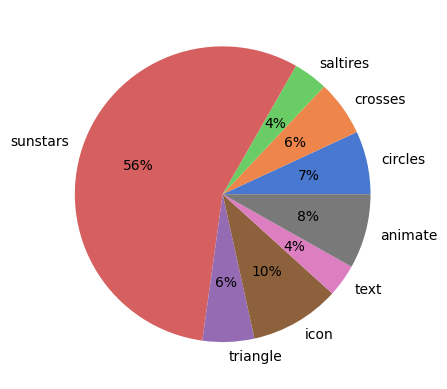

In [16]:
symbols_df = pd.DataFrame({
    'symbols count': [df['circles'].sum(), df['crosses'].sum(), df['saltires'].sum(), df['sunstars'].sum(),df['triangle'].sum(), df['icon'].sum(),df['text'].sum(),df['animate'].sum()],
    'symbols name': ['circles', 'crosses', 'saltires', 'sunstars','triangle','icon','text','animate']
})

plt.pie(symbols_df['symbols count'], labels=symbols_df['symbols name'], colors=sns.color_palette("muted"), autopct='%.0f%%')

plt.show() 

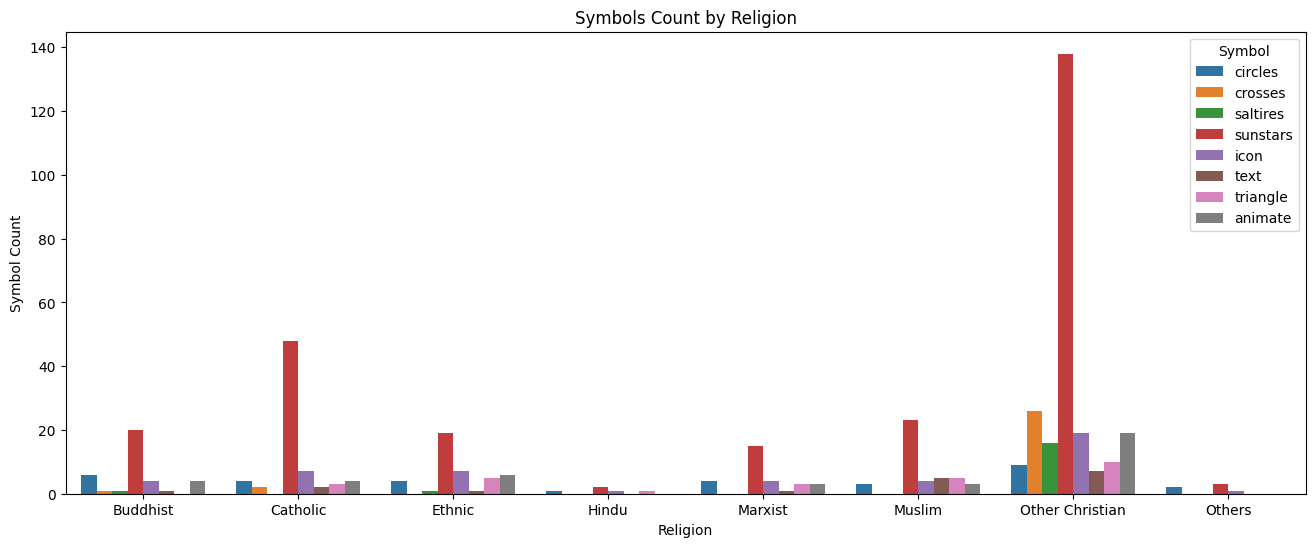

In [17]:
religion_symbols_df = df.groupby('religion_text')[['circles', 'crosses', 'saltires', 'sunstars','icon','text','triangle','animate']].sum().reset_index()
religion_symbols_df = religion_symbols_df.melt(id_vars='religion_text', var_name='symbol', value_name='count')

plt.figure(figsize=(16, 6))
sns.barplot(data=religion_symbols_df, x='religion_text', y='count', hue='symbol')

graphing_template('Symbols Count by Religion','Religion','Symbol Count')
plt.legend(title='Symbol')

plt.show()

The reason christians have the most stars is because they often designate states that way. 